## $\S$ 3.2.1. Example: Prostate Cancer

In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('../data/prostate/prostate.data', delimiter='\t',
                   index_col=0)
data.head(7)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
6,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468,T
7,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468,F


In [3]:
data.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [4]:
"""Table 3.1. Correlations of predictors in the prostate cancer data

It shows many string correlations. For example, that both `lcavol` and
`lcp` show a strong relationship with the response `lpsa`, and with each
other. We need to fit the effects jointly to untangle the relationships
between the predictors and the response."""
data.corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652,0.734460
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354,0.433319
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112,0.169593
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460,0.179809
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648,0.566218
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528,0.548813
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905,0.368987
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000,0.422316
lpsa,0.734460,0.433319,0.169593,0.179809,0.566218,0.548813,0.368987,0.422316,1.000000


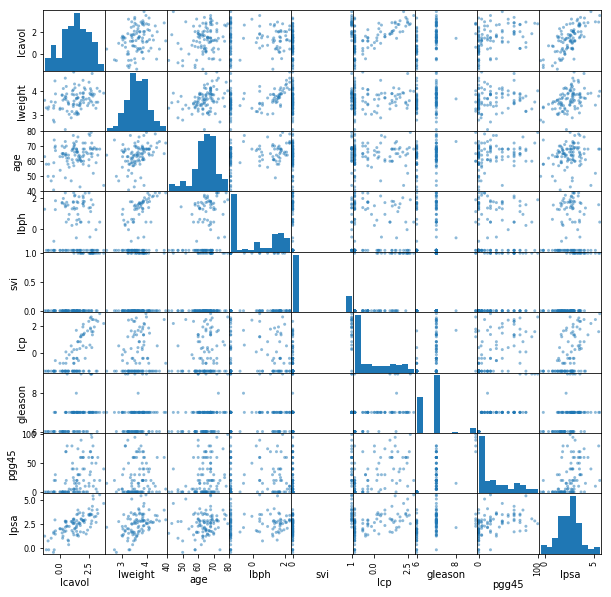

In [5]:
"""FIGURE 1.1. Scatterplot matrix of the prostate cancer data"""
fig = plt.figure()
pd.plotting.scatter_matrix(data, figsize=(10, 10))
plt.show()

In [6]:
"""Table 3.2. Linear model fit to the prostate cancer data.

Roughly a Z score larger than two in absolute value is significant nonzero
at the p = 0.05 level.

We fit a linear model to the log of prostate-specific antigen, `lpsa`,
after first standardizing the predictors to have unit variance. We randomly
split the dataset into a training set of size 67 and a test set of size 30.
"""
data_y = data['lpsa']
data_x_normalized = data.drop(['train', 'lpsa'], axis=1)\
                        .apply(scipy.stats.zscore)
# data_normalized.describe()  # check it normalized!

data_x_train = data_x_normalized[data['train'] == 'T']
data_y_train = data_y[data['train'] == 'T']
data_x_test = data_x_normalized[data['train'] == 'F']
data_y_test = data_y[data['train'] == 'F']

size_train = sum(data['train'] == 'T')
size_test = sum(data['train'] == 'F')
size_predictor = len(data_x_train.columns)

mat_x = np.hstack((np.ones((size_train, 1)), data_x_train.as_matrix()))
vec_y = data_y_train.as_matrix()
mat_xt = np.transpose(mat_x)
mat_xx_inv = np.linalg.inv(np.matmul(mat_xt, mat_x))

ols_beta = np.matmul(mat_xx_inv, np.matmul(mat_xt, vec_y))
vec_y_fitted = np.matmul(mat_x, ols_beta)
est_sigma2 = sum((vec_y-vec_y_fitted)**2)/(size_train-size_predictor-1)

table_term = ['Intercept'] + list(data_x_train.columns)
table_coeff = ols_beta
table_stderr = [math.sqrt(mat_xx_inv[j, j]*est_sigma2)
                for j in range(size_predictor+1)]

print('{0:>15} {1:>15} {2:>15} {3:>15}'.format('Term', 'Coefficient',
                                               'Std. Error', 'Z Score'))
for term, coeff, stderr in zip(table_term, table_coeff, table_stderr):
    print('{0:>15} {1:>15f} {2:>15f} {3:>15f}'.format(term, coeff,
                                                      stderr, coeff/stderr))

           Term     Coefficient      Std. Error         Z Score
      Intercept        2.464933        0.089315       27.598203
         lcavol        0.676016        0.125975        5.366290
        lweight        0.261694        0.095134        2.750789
            age       -0.140734        0.100819       -1.395909
           lbph        0.209061        0.101691        2.055846
            svi        0.303623        0.122962        2.469255
            lcp       -0.287002        0.153731       -1.866913
        gleason       -0.021195        0.144497       -0.146681
          pgg45        0.265576        0.152820        1.737840


In [18]:
"""F test for the exclusion of a number of terms at once

For example, we cansider dropping all the non-significant terms, namely
age, lcp, gleason, and pgg45."""
print("Null hypothesis: beta[3]=beta[6]=beta[7]=beta[8]=0")
data_x_train_alt = data_x_train.drop(['age', 'lcp', 'gleason', 'pgg45'],
                                     axis=1)

size_predictor_alt = len(data_x_train_alt.columns)

mat_x_alt = np.hstack((np.ones((size_train, 1)), data_x_train_alt.as_matrix()))
mat_xt_alt = np.transpose(mat_x_alt)
ols_beta_alt = np.linalg.solve(np.matmul(mat_xt_alt, mat_x_alt),
                               np.matmul(mat_xt_alt, vec_y))

vec_y_fitted_alt = np.matmul(mat_x_alt, ols_beta_alt)

rss0 = sum((vec_y-vec_y_fitted_alt)**2)
rss1 = sum((vec_y-vec_y_fitted)**2)
F_stat = (rss0-rss1)/(size_predictor-size_predictor_alt)*(size_train-size_predictor-1)/rss1
print('F = {}'.format(F_stat))
print('Pr(F({dfn},{dfd}) > {fstat:>.2f}) = {prob:.2f}'.format(
    dfn=size_predictor-size_predictor_alt,
    dfd=size_train-size_predictor-1,
    fstat=F_stat,
    prob=1-scipy.stats.f.cdf(F_stat,
                             dfn=size_predictor-size_predictor_alt,
                             dfd=size_train-size_predictor-1),
))

Null hypothesis: beta[3]=beta[6]=beta[7]=beta[8]=0
F = 1.6697548846375236
Pr(F(4,58) > 1.67) = 0.17


In [25]:
"""Prediction error on the test data

We can see that the linear model reduces the base error rate by about 50%
"""

mean_y_train = sum(vec_y)/size_train

mat_x_test = np.hstack((np.ones((size_test, 1)), data_x_test.as_matrix()))
vec_y_test = data_y_test.as_matrix()
vec_y_test_fitted = np.matmul(mat_x_test, ols_beta)

err_base = sum((vec_y_test-mean_y_train)**2)/size_test
err_ols = sum((vec_y_test-vec_y_test_fitted)**2)/size_test

print('Base error rate = {}'.format(err_base))
print('OLS error rate = {}'.format(err_ols))

Base error rate = 1.0567332280603818
OLS error rate = 0.5212740055076
